# Что такое нейросеть?

В математическом смысле - композиция функций. Ни больше, ни меньше.

$f(x) = a(x) + b$ - вполне себе.

$g(x) = \sigma(x)$, тогда $g(f(x))$ - тоже таки себе нейросеть в рамках определения.

Такое широкое определение нужно потому, что оно уже позволяет делать выводы о применимости нейросетей, а какие-то его сужения, известные мне, заставляют считать не-нейросетью что-то, что вполне себе нейросеть в "обычном" для практиков отрасли смысле. Так уж вышло, что приведённая выше $g(f(x))$ - это один из базовых "кирпичиков" или "узлов", из которых состоят нейросети, в. т.ч. те, которые рисуют картинки или общаются с вами на естественном языке. Вот схема этой штуки: 


![](images/perceptron.png)

На рисунке есть некая "функция активации". Её смысл в том, чтобы выражение $(g(g(x)))$ не было бессмысленным. Композиция линейных функций, вы помните это ещё о линейной регрессии - это штука не очень-то внятная, если мы хотим увеличить "выразительную способность" нашей модели:

![](images/2linear.png)

В чём смысл делать $g(g(x))$? Рассмотрим чуть дальше. Пока лишь заметим, что есть очень много способов сделать композицию функций, даже если мы выбираем только из "хороших" функций: гладких, определённых где нужно; не заглядывая в кунсткамеру математики в поисках странного (а его там есть и много: [раз](https://ru.wikipedia.org/wiki/%D0%9A%D0%B0%D0%BD%D1%82%D0%BE%D1%80%D0%BE%D0%B2%D0%B0_%D0%BB%D0%B5%D1%81%D1%82%D0%BD%D0%B8%D1%86%D0%B0), [два](https://ru.wikipedia.org/wiki/%D0%9A%D1%80%D0%B8%D0%B2%D0%B0%D1%8F_%D0%9F%D0%B5%D0%B0%D0%BD%D0%BE), индикаторная функция для [три](https://ru.wikipedia.org/wiki/%D0%9C%D0%BD%D0%BE%D0%B6%D0%B5%D1%81%D1%82%D0%B2%D0%BE_%D0%92%D0%B8%D1%82%D0%B0%D0%BB%D0%B8)).

Нам понадобится посмотреть на то, что и почему тут будет работать. Как нам компоновать функции, чтобы они хорошо решали нашу задачу.
 

# Почему это может работать?


Один из теоретических результатов, который говорит о том, что нейросети - это крутая штука, которая хорошо приближает функции, это Теорема об Универсальной Аппроксимации за авторством Дж. Цыбенко:

![](images/cybenko.png)

В изложении выше появляется слово "слой". Понять его смысл проще, если поглядеть на схему полносвязной нейросети. Каждый узел в ней делает какую-то простую математическую операцию:

![](images/homeNN.png) ![](images/layer.png)


Можно заметить, что в конструкции из теоремы 2 слоя. А область машинного обучения почему-то называется *Deep* learning. Краткий ответ такой: на практике глубокие сети из многих умеренно широких слоёв работают лучше, чем сеть из пары супер-мега-широченных слоищщев. Теория тут, на данный момент отстаёт от инженерии, т.е. ситуация, когда про какую-то очень хорошо в реальности работающую сеть нет способа понять, а хороша ли она, не попробовав её обучить. Впрочем, вот несколько более современных статей об аппроксимирующей способности нейросетей для тех, кто интересуется.
* [Approximation Capabilities of Multilayer Feedforward Networks](https://web.njit.edu/~usman/courses/cs677_spring21/hornik-nn-1991.pdf), 1991. Обобщение теоремы Цыбенко для функций активации, которые не-сигмоида. Важно, т.к. по факту сигмоида сейчас практически не используется "в середине" сети из-за проблемы с насыщением и исчезающими градиентами. Проблема состоит в том, что если аргумент сигмоиды далеко от ноля, то сигмоида в окрестности аргумента меняется очень, очень медленно, т.е. производная там маленькая, т.е. полученный по chain rule градинет для нижележащий параметров будет включать очень маленьний сомножитель и параметры будут меняться очень медленно: придётся учить сеть сильно дольше
* [The Power of Depth for Feedforward Neural Networks](https://arxiv.org/abs/1512.03965), 2015. Подсвечивается проблема, которая к тому времени уже очевидна в практической плоскости: глубокие сети хорошо работают на практике, а "малослойные" - нет. Основной результат говорит, что есть такие функции, которые:
  * Действуют из $\mathbb{R}^d$ в $\mathbb{R}$
  * Являются "хорошими", т.е. возникают в реальных задачах, а не только в воображении математиков
  * Плохо приближаются 2-слойной полносвязной нейросетью: придётся сделать экспоненциально много (порядка $e^d$) нейронов на нашем слое, чтобы приблизить функцию действительно точно
  * Хорошо приближаются 3-слойной полносвязной нейросетью: которой для сходной точности нужно полиномиальное число параметров на слой (порядка $d^\frac{19}{4}$)
* [On the Expressive Power of Deep Neural Networks](https://arxiv.org/abs/1606.05336), 2016. Авторы вводят явную характеристику, которая описывает "выразителность" нейросети, т.е. насколько сложные и разнообразные функции она может описать. А потом показывают, что "выразительность" экспоненциально увеличивается с глубиной сети (т.е. с кол-вом слоёв).
* [Universal Approximation with Deep Narrow Networks](https://arxiv.org/abs/1905.08539), 2020. Авторы  обобщают теорему Цыбенко: теперь там в посылке не очевидно непрактичный один экспоненциально широкий слой, а несколько слоёв линейной (по размерности данных) ширины  + ограничения на активацию внятные, т.е. допускается примерно любая практически используемая функция активации.

**Важно!** Все вышеприведённые рассуждения описывают полносвязную сеть. Когда каждый нейрончик с слоя n-1 отправляет свой выход в каждый нейрончик слоя n. В реальности сети почти всегда сложнее:) В них есть полносвязны блоки, но кроме того в них есть и разные другие способы композиции функций. Более подробно мы это рассмотрим на парах про сети для картинок и сети для текстов. А пока пара примеров архитектур, которые не являются полносвязной feed-forward сетью.

[U-net](https://arxiv.org/abs/1505.04597)

![](images/unet.png)

[Transformer](https://arxiv.org/abs/1706.03762)

![](images/transformer1.png)
![](images/transformer2.png)

# Собираем всё вместе

Нейросети - это вид моделей, которые мы обучаем в задаче машинного обучения. У них всё так же есть параметры (веса в нейронах) и гиперпараметры (архитектура, кол-во слоёв, etc). Нам всё так же нужны данные и процедура обучения. Всё так же самое практичное (читай "единственное, что сейчас хорошо работает") - это учить градиентным спуском, т.е. нам понадобится лосс. В общем, всё осталось как было, просто нам подарили волшебный чёрный ящик, которые, так уж вышло, может хорошо выучить даже очень, очень сложные зависимости из данных. А может и не выучить, т.к. даже теоремы выше говорят "для полносвязной сети конечного размера существуют параметры, которые приближают любую непрерывную функцию сколь угодно хорошо". Невооруженным глазом видны шероховатости:
* А эти параметры, они сейчас с нами, в одной комнате? Никто не гарантирует что наш метод обучения позволит нам найти оптимум
* А вот функция, которая наша истинная зависимость, она правда непрерывная? А она правда вообще есть?
* А вот что-то полносвязная сеть очень плохо справляется с моей задачей, а увеличивать некуда уже, и так веса занимают полтерабайта видеопамяти. Надо что-то делать.

Для того, чтобы не стереть нашу решимость к ML в прах об эти шероховатости, давайте что-нибудь напрограммируем и поглядим, что получится.

# Программируем нейросеть

Дальнейшее представляет собой пересказ замечательных и чудесных [лекций](https://www.youtube.com/playlist?list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ) от Andrej Karpathy. Я очень-очень рекомендую эти видео, если у вас есть минимальный английский и вам интересна тема нейросетей. Пожалуй, это лучшее, что можно найти для плавного погружения в тему с инженерной стороны

Итак, нейросети - это очень большие математические выражения. Давайте попытаемся посмотреть на них глазами, а для этого реализуем объект `Value`, которым будем оперировать в наших выражениях.

У `Value` будет несколько полей.   
* `data` - числовое значение  
* `_children` - множество другиех `Value` с помощью которых было получено это значение.   
    Например если  
    ```python
    a = Value(1)
    b = Value(2)
    c = a + b
    print(c._children) # set(a, b)
    ```

  А эти параметры нужны просто для дальнейшией визуализации выражений 
* `_op` - строка в которой написано, с помощью какой операции было полученно значение. Например `"+"` или `"sigmoid"`  
* `label` - просто название переменной

Для начала мы хотим уметь складывать и умножать `Value`

In [1]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"
  
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

In [2]:

input = Value(-1, label='input')

a = Value(-0.6, label='a')
b = Value(1.4, label='b')
c = a * input; c.label = 'c'

output = c + b; output.label = 'output'
output

Value(data=2.0)

In [3]:
from karpathy_code import draw_dot

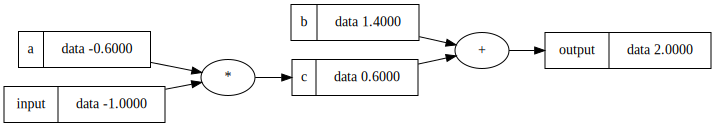

In [4]:
draw_dot(output)

Далее мы хотим для каждого `Value` уметь считать по нему частную производную: нам же надо нейросеть обучать градиентными методами, а считать каждый раз градиенты руками под каждый параметр каждой архитектуры - ну уж нет. 

Доработаем класс `Value`, чтобы считать производные  
В `self.grad` мы будем хранить значение частной производной от интересного нам выражения (т.е., обычно, от лосса) по нашему параметру. Это в точности сообщает нам, куда надо поменять данное конкретное Value, чтобы уменьшить лосс. Изначально переменная не состоит ни в каком выражении, ни на что не влиет, поэтому поставим `self.grad = 0.0` 

Чтобы облегчить вычисление производной от огромного выражения, мы хотим разбить его на понятные, влезающие в голову кусочки. У нас будет функция `self._backward`, которую мы будем вызывать рекурсивно у каждого `Value` в выражении, чтобы посчитать градиент у его `_children`, двигаясь от результата, который выдала нейросеть "в глубь" выражения. Это в точности расчёт производной сложной функции по правилу Лейбница, только функция не $f(g(x))$, а вся наша нейросеть: $$Loss(Layer_N(Layer_{N-1}(...Layer_1(input) ...)))$$


```python
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label
```

Рассмотрим пример. Пусть у нас есть выражение `F`
```
y = a * b
F = f(y)
```
Тогда `y._children = set(a, b)`   

И допустим мы уже как-то вычислили градиент от `F` по `y` и он равен `y.grad`  
Мы хотим узнать градиент по весам `a` и `b`, вызвав `._backward()` у `y`. Но сейчас этот метод ничего не делает. Надо его как-то определить.  
По правилу взятия производной сложной функции $$ a.grad = \frac{dF(y(a))}{da} = \frac{dF}{dy} * \frac{dy}{da} $$ `a.grad` должен быть равен $$ \frac{dF}{dy} * \frac{dy}{da} = y.grad * \frac{a*b}{da} = y.grad * b.data $$
Аналогично $$ b.grad = \frac{dF}{dy} * \frac{dy}{db} = y.grad * a.data $$ 
  
Давайте, при создании значения `y` через произведение `a * b` присваивать в метод `._backward` функцию, которая будет расчитывать значения градиентов у `children`, то есть у `a` и `b` в нашем случае.  
```python
class Value:
    def __mul__(self, other):
        # создаем `y` когда умножаем `a` на `b`
        out = Value(self.data * other.data, (self, other), '*')
        
        def _backward():
            self.grad += other.data * out.grad 
            other.grad += self.data * out.grad

        out._backward = _backward
        
        return out
```

В строках
```python
self.grad += other.data * out.grad 
other.grad += self.data * out.grad
```
мы делаем `+=`, а не `=`, потому что переменная/значение может встречается в выражении несколько раз.  
Например
`y = a * (a * b)`  
Тут производная по `a`, если считать на бумажке, получится  
$ \frac{dy}{da} = 2ba $  
  
А если считать алгоритмом  
`a.grad = y.grad * (a * b).data + (a * b).grad * b.data = y.grad * (a * b).data + (y.grad * a.data) * b.data`  
Если преобразовать, то получится также, как мы и посчитали руками  
`a.grad = y.grad * 2 * b * a`  

Сначала наш алгоритм посчитает градиент из первого умножения `y = a * ...`   
А потом из второго `...(a * b)`  


In [5]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')
        
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad

        out._backward = _backward
        
        return out

Проверим наш код!

In [6]:
a = Value(3, label='a')
b = Value(5, label='b')
y = a * b; y.label ='y'

Пусть `y` часть какой-то функции f(y), мы знаем градиент `y` у этой функции. Впишем это значение руками 

In [7]:
y.grad = 2.0 
y._backward()
a.grad, b.grad

(10.0, 6.0)

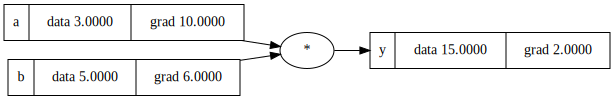

In [8]:
draw_dot(y)

Проверим на бумажке  
$ \frac{dF}{da} = \frac{dF}{dy} * \frac{dy}{da} = 2.0 * \frac{d(a * b)}{da} = 2.0 * b = 2.0 * 5 = 10 $  
  
$ \frac{dF}{db} = \frac{dF}{dy} * \frac{dy}{db} = 2.0 * \frac{d(a * b)}{db} = 2.0 * a = 2.0 * 3 = 6 $  
  


Теперь, чтобы не вписывать граниент по y руками, а получать его честно, мы должны для каждой операции, которую хотим использовать с `Value` определить, как через нее будет `течь` градиент.  
## Реализуем для сложения  
Там градиент у `children` будет такой же как у `родителя`? , т.к. $$\frac{d(a+b)}{da} = 1$$ и от $$\frac{dF}{dy} * \frac{dy}{da}$$ остаётся $$\frac{dF}{dy} * 1$$
```py
class Value:
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')
    
        def _backward():
           self.grad += out.grad
           other.grad += out.grad
        out._backward = _backward
    
        return out
```

## И еще для нескольких операций
### Сделаем деление через возведение в -1ую степень

```python
class Value:
    def __pow__(self, other):
        # Не ручаюсь, что причина именно в этом, но вангую, что автор разрешил тут только числа, чтобы не связываться с комплексной экспонентой, т.к. производная z_1 ^ z_2 - это сложно. Для желающих подробностей - вот https://pytorch.org/docs/stable/notes/autograd.html#wirtinger-calculus-comes-into-the-picture
        assert isinstance(other, (int, float)), "only supporting int/float powers for now"
        out = Value(self.data ** other, (self,), f'**{other}')

        def _backward():
            self.grad += other * (self.data ** (other - 1)) * out.grad
        out._backward = _backward

        return out

    def __truediv__(self, other): # self / other
        return self * other ** -1

    def __neg__(self): # -self
        return self * -1

    def __sub__(self, other): # self - other
        return self + (-other)

    def __rmul__(self, other): # other * self
        return self * other

    def __radd__(self, other): # other + self
        return self + other
```

In [9]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')
        
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad

        out._backward = _backward
        
        return out

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')
    
        def _backward():
           self.grad += 1.0 * out.grad
           other.grad += 1.0 * out.grad
        out._backward = _backward
    
        return out
    
    def __pow__(self, other):
        assert isinstance(other, (int, float)), "only supporting int/float powers for now"
        out = Value(self.data ** other, (self,), f'**{other}')

        def _backward():
            self.grad += other * (self.data ** (other - 1)) * out.grad
        out._backward = _backward

        return out

    def __truediv__(self, other): # self / other
        return self * other ** -1

    def __neg__(self): # -self
        return self * -1

    def __sub__(self, other): # self - other
        return self + (-other)

    def __rmul__(self, other): # other * self
        return self * other

    def __radd__(self, other): # other + self
        return self + other

## Теперь давайте посчатаем градиент сложной функции.  
Сделаем это рекурсивно для всех переменных  
Чтобы у нас всё работало как должно, нам надо вызывать `._backward()` только когда у родителей уже посчитан градиент, т.к. мы опираемся на .grad от родителя. 
Чтобы понять в каком порядке делать `._backward()` отсортируем все вершины, чтобы родители были в списке раньше их детей. Это можно сделать с помощью [топологической сортировки](https://ru.wikipedia.org/wiki/%D0%A2%D0%BE%D0%BF%D0%BE%D0%BB%D0%BE%D0%B3%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%81%D0%BE%D1%80%D1%82%D0%B8%D1%80%D0%BE%D0%B2%D0%BA%D0%B0).


In [10]:
def backward(value):
    topo = []
    visited = set()
    def build_topo(v):  # топологическая сортировка
        if v not in visited:
            visited.add(v)
            for child in v._prev:
                build_topo(child)
            topo.append(v)
    build_topo(value)

    value.grad = 1.0
    for node in reversed(topo): # посчитаем градиент во всех вершинах, которые ближе к концу, чем наша
        node._backward()

Value.backward = backward

Придумаем сложную функцию

$ f(x, a, b, c) = \frac{ax^2 + bx}{c} - \frac{a}{b+c} + x $  
  
Пусть:
```py
a = 1
b = 2
c = 3
x = 4
```

Давайте теперь вычислим производную по каждом параментру


1. Производная по \(a\):
\[
$ \frac{\partial f}{\partial a} = \frac{x^2}{c} -\frac{1}{b + c} = \frac{4^2}{3} -\frac{1}{2 + 3} = \frac{16}{3} -\frac{1}{5} = \frac{77}{15} \approx 5.13$
\]

2. Производная по \(b\):
\[
$ \frac{\partial f}{\partial b} = \frac{x}{c} + \frac{a}{(b + c)^2} = \frac{4}{3} + \frac{1}{(2 + 3)^2} = \frac{4}{3} + \frac{1}{25} = \frac{103}{75} \approx 1.37 $
\]

3. Производная по \(c\):
\[
$ \frac{\partial f}{\partial c} = - \frac{ax^2 + bx}{c^2} + \frac{a}{(b + c)^2} = - \frac{1 \cdot 4^2 + 2 \cdot 4}{3^2} + \frac{1}{(2 + 3)^2} = - \frac{16 + 8}{9} + \frac{1}{25} = -\frac{197}{75} \approx -2.63 $
\]

In [11]:
a = Value(1, label='a')
b = Value(2, label='b')
c = Value(3, label='c')
x = Value(4, label='x')

t1 = x ** 2; t1.label='t1'
t2 = a * t1; t2.label='t2'
t3 = b * x; t3.label='t3'
t4 = t2 + t3; t4.label='t4'
t5 = t4 / c; t5.label='t5'
t6 = b + c; t6.label='t6'
t7 = a / t6; t7.label='t7'
t8 = t5 - t7; t8.label='t8'
t9 = t8 + x; t9.label='t9'
t9.backward()
[round(x,2) for x in (a.grad, b.grad, c.grad)]

[5.13, 1.37, -2.63]

Победа. Посмотрим на граф.

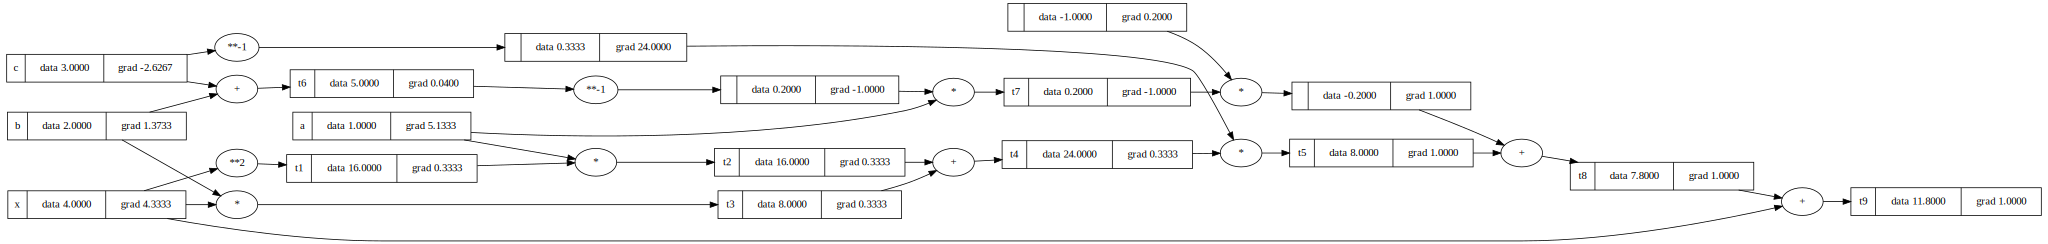

In [12]:
draw_dot(t9)

Реализуем гиперболический тангенс - одну из классических функций, используемых в качестве активации в нейросетях.

In [13]:
import math

def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')

    def _backward():
        self.grad += (1 - t**2) * out.grad
    out._backward = _backward

    return out

Value.tanh = tanh

Вспомним, как выглядела простая нейросеть из начала пары. Она называется "перцептрон" и была [придумана](https://ru.wikipedia.org/wiki/%D0%9F%D0%B5%D1%80%D1%86%D0%B5%D0%BF%D1%82%D1%80%D0%BE%D0%BD) Фрэнком Розенблаттом аж в 1957 году 


![](images/perceptron.png)

Допишем нужные кусочки кода, чтобы перейти от графов и Value к нейростям из нейронов и слоёв

In [14]:
import random

class Neuron:
    def __init__(self, n_in): # n_in - это размерность x, подаваемого на вход
        # веса изначально инициализируются рандомно
        self.w = [Value(random.uniform(-1, 1)) for _ in range(n_in)]
        self.b = Value(random.uniform(-1, 1))
  
    # с помощью __call__ мы будем подавать x в нейрон
    def __call__(self, x):
        # w * x + b
        act = sum((wi * xi for wi, xi in zip(self.w, x))) + self.b
        out = act.tanh()
        return out
  
    def parameters(self):
        return self.w + [self.b]
    
x = [2.0, 3.0]
n = Neuron(2) # нейрон, который принимает два входа
print(f'n.w {n.w}\nn.b {n.b}\nn(x) {n(x)}')

n.w [Value(data=-0.05690667080836698), Value(data=-0.3965867421143674)]
n.b Value(data=-0.9109733889636986)
n(x) Value(data=-0.9764304929708302)


Наконец, опишем полносвязный слой нейросети. "Полносвязный" означает, что каждый нейрон видит все компоненты вектора, пришедшего на вход.

In [15]:
class Layer:
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]
  
    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs) == 1 else outs
  
    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]

### Теперь сделаем MLP (Multi layer perceptron)(Многослойный перцептрон)
Который уже сам по себе честно является нейросетью. Например, в современном мире он используется для рендеринга 3d-сцен методами машинного обучения, вот [статья](https://arxiv.org/pdf/2102.07064.pdf)

![](images/nerf.png)

Он состоит из нескольких своёв. Каждый последующий слой принимает сколько параметров на вход, сколько выходов вернул предыдущий слой.

In [16]:
class MLP:
    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]
  
    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x
  
    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]

Вот схематичное изображение MLP

![](images/MLP.png)

In [17]:
class MLP:
    def __init__(self, features_in, layers_out_dimensions):
        sizes = [features_in] + layers_out_dimensions
        self.layers = [Layer(sizes[i], sizes[i+1]) for i in range(len(layers_out_dimensions))]
  
    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x
  
    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]

In [18]:
# реализуем картинку выше
model = MLP(3, [4, 4, 1])
x = [2, 3, 4]
print(model.layers)
model(x)

[<__main__.Layer object at 0x7a76f00e27d0>, <__main__.Layer object at 0x7a76f00e2d10>, <__main__.Layer object at 0x7a76f00e3c40>]


Value(data=0.08674047546220298)

# Обучаем нейросеть

Вот датасетик с 4мя примерами

In [19]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, 0, 0, 1.0]

In [20]:
# датасете у каждого примеров по 3 фичи, поэтому первый аргумент - 3
# Потом пусть стоят два слоя по 4 нейрона, и в конце один на один нейрон, чтобы на выходе получить одно число
model = MLP(3, [4, 4, 1])

In [21]:
list(zip((model(x) for x in xs), ys))

[(Value(data=0.23281407871618967), 1.0),
 (Value(data=0.8445319997321392), 0),
 (Value(data=0.567010073212936), 0),
 (Value(data=0.41070356988595735), 1.0)]

Пока предсказания так себе. Чтобы это исправить, надо, как обычно, посчитать лосс для выходов модели и правильных ответаов и итеративно минимизировать эту разницу. А весь инструментарий для расчёта градиентов мы уже написали! Время пожинать плоды:

In [22]:
def loss(y_preds, y_targets):
    return sum([(pred - y) ** 2 for pred, y in zip(y_preds, y_targets)]) / len(y_targets)

In [23]:
preds = [model(x) for x in xs]
loss_value = loss(preds, ys)
print(loss_value)

Value(data=0.49264481051443715)


In [24]:
loss_value.backward()

Посмотрим на какой-нибудь градиент

In [25]:
model.layers[0].neurons[0].w[0].grad

0.17006990851593057

Посмотрим на одним глазом на вычислительный граф, который порождается c помощью Value, входящих в наш MLP. Даже для такой микросети он получается огромным. Хорошо, что нам не нужно считать производные руками!

# Огромная картинка

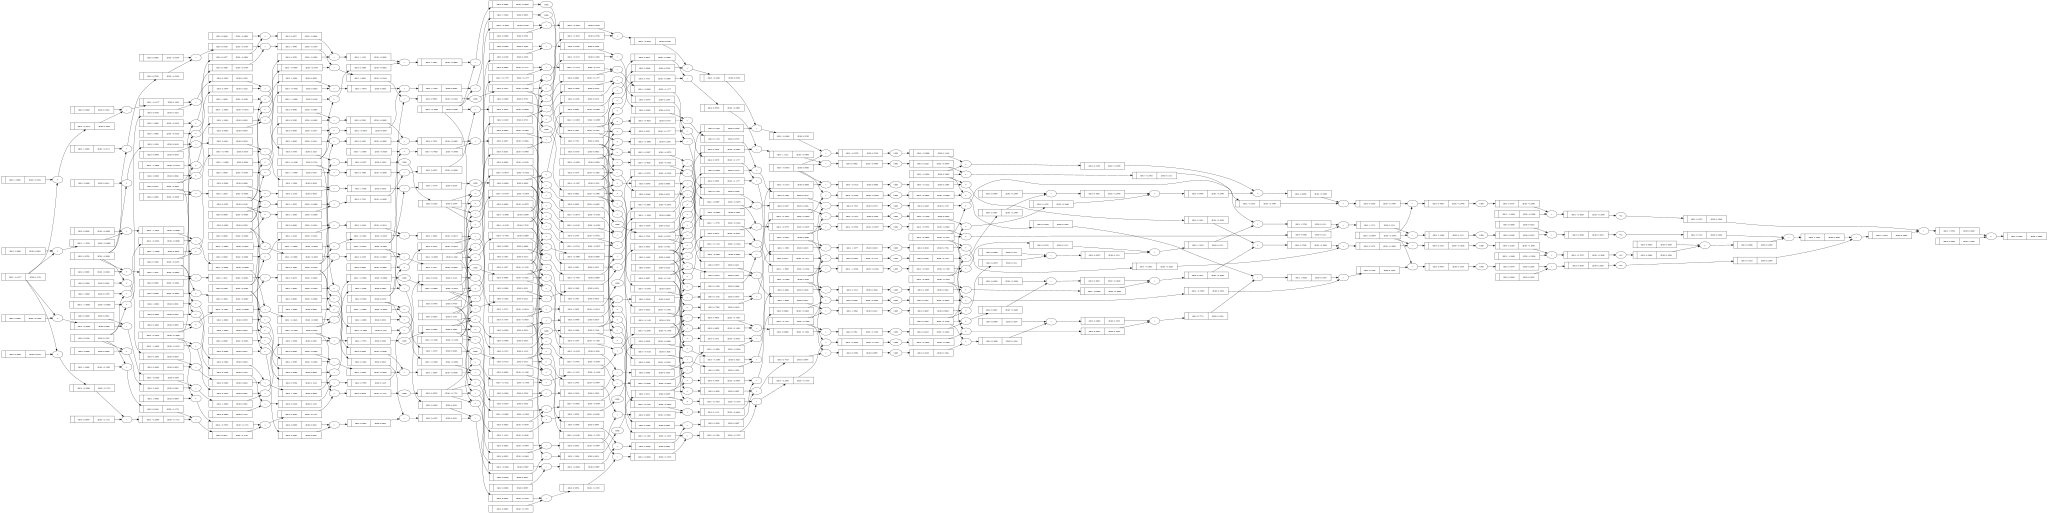

In [26]:
draw_dot(loss_value)

# Конец огромной картинки

А теперь начнём обучать нашу сеть.

In [27]:
def train(model, epochs, lr):
    for k in range(epochs):
        # forward
        preds = [model(x) for x in xs]
        # calc loss
        loss_value = loss(preds, ys)
        
        # обнулим градиенты, после прошлого backward
        for p in model.parameters():
            p.grad = 0.0

        # посчитаем градиенты
        loss_value.backward()
        
        # обновим параметры
        for p in model.parameters():
            p.data += -lr * p.grad
        
        print(k, loss_value.data)

In [28]:
train(model, 50,0.1)

0 0.49264481051443715
1 0.3832663208516943
2 0.3573307919783754
3 0.33569980426365786
4 0.3136325459393712
5 0.290310291311316
6 0.26625494259581006
7 0.24270130009599855
8 0.22085912164211224
9 0.2012514108877791
10 0.1837196768245881
11 0.16785132290292376
12 0.15327552792953936
13 0.13974969917534202
14 0.12715419132128553
15 0.11545787553760707
16 0.1046761319709074
17 0.09483259272051302
18 0.08593251541168964
19 0.07795116350030296
20 0.07083522147599644
21 0.06451173795747439
22 0.05889881989142894
23 0.05391435914308139
24 0.04948152639757779
25 0.045531372182051444
26 0.042003464074311686
27 0.038845447594047414
28 0.03601215074124746
29 0.03346458708428745
30 0.03116902578618734
31 0.029096188593588715
32 0.027220580117144857
33 0.0255199359033058
34 0.023974767110761394
35 0.022567981911936617
36 0.021284567343840086
37 0.020111319113737147
38 0.0190366100401727
39 0.01805019021689045
40 0.017143013712558247
41 0.016307087819714315
42 0.015535341693907766
43 0.01482151180020

In [29]:
list(zip((model(x) for x in xs), ys))

[(Value(data=0.8872270154789065), 1.0),
 (Value(data=0.0307240154698778), 0),
 (Value(data=0.024447359904758777), 0),
 (Value(data=0.826978059327719), 1.0)]

# Тоже самое на [pytorch](https://pytorch.org/)

In [30]:
from torch import nn
# пишем какие операции использовать друг за другом
model = nn.Sequential(
    nn.Linear(3, 4),
    nn.Tanh(),
    nn.Linear(4, 4),
    nn.Tanh(),
    nn.Linear(4, 1),
    nn.Tanh()
)

Зачастую используемая архитектура нетривиальна. Базовые блоки торча по типу `nn.Linear`, `nn.Tanh`,   
а также их композиции, такие как `nn.Sequential` не позволяют описать прямой прогон сети и расчёт градиентов.  
Для того, чтобы описать логику прогона в торче есть интерфейс, позволяющий писать кастомные модули  
https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html
Впрочем, "из коробки" торч покрывает очень, очень многое. В 2024 в индустрии стандарт де-факто - это как раз торч.

In [31]:
import torch
from torch import nn


class AmogusNet(nn.Module):
    # в init мы объявляем все слои и операции из которых будем строить сеть
    def __init__(self):
        super().__init__()
        self.liner1 = nn.Linear(3, 4)
        self.liner2 = nn.Linear(4, 4)
        self.liner3 = nn.Linear(4, 1)
        self.tanh = nn.Tanh()
    
    # в forward надо написать, как мы вычисляем результат
    # когда мы пишем model(x) под капотом вызывается __call__, а __call__ вызывает forward
    def forward(self, x):
        x = self.liner1(x)
        x = self.tanh(x)
        x = self.liner2(x)
        x = self.tanh(x)
        x = self.liner3(x)
        x = self.tanh(x)
        return x.squeeze()


# Поскольку мы использовали стандартные блоки, всю машинерию с градиентами, бэквардом и прочим торч умеет делать за нас!
# Причём, в отличии от нашего учебного примера с Value, торч ещё и эффективно параллелизует вычисления, с использованием GPU, если она есть.

In [32]:
model = AmogusNet()

In [33]:
xs = torch.tensor(xs)
ys = torch.tensor(ys)
print(xs)
print(ys)

tensor([[ 2.0000,  3.0000, -1.0000],
        [ 3.0000, -1.0000,  0.5000],
        [ 0.5000,  1.0000,  1.0000],
        [ 1.0000,  1.0000, -1.0000]])
tensor([1., 0., 0., 1.])


In [34]:
list(zip((model(x) for x in xs), ys))

[(tensor(0.4291, grad_fn=<SqueezeBackward0>), tensor(1.)),
 (tensor(0.4323, grad_fn=<SqueezeBackward0>), tensor(0.)),
 (tensor(0.4650, grad_fn=<SqueezeBackward0>), tensor(0.)),
 (tensor(0.4192, grad_fn=<SqueezeBackward0>), tensor(1.))]

In [35]:
def train(model, loss, epochs, lr):
    for k in range(epochs):
        preds = model(xs)
        loss_value = loss(ys, preds)
        
        model.zero_grad()
        loss_value.backward()
        
        with torch.no_grad(): # чтобы руками шатать градиенты в параментрах модели надо писать no_grad, иначе торч сам за нас всё посчитает
            for param in model.parameters():
                param += -lr * param.grad
        
        print(k, loss_value.data)

In [36]:
# вообще подошел бы и наш лосс, написанный вручную, но в торче есть встроенный
mse_loss = nn.MSELoss()
model = AmogusNet()
train(model, mse_loss, 50, 0.1)

0 tensor(0.7175)
1 tensor(0.4281)
2 tensor(0.3014)
3 tensor(0.2493)
4 tensor(0.2236)
5 tensor(0.2078)
6 tensor(0.1961)
7 tensor(0.1860)
8 tensor(0.1765)
9 tensor(0.1673)
10 tensor(0.1580)
11 tensor(0.1487)
12 tensor(0.1392)
13 tensor(0.1298)
14 tensor(0.1204)
15 tensor(0.1112)
16 tensor(0.1024)
17 tensor(0.0939)
18 tensor(0.0861)
19 tensor(0.0788)
20 tensor(0.0721)
21 tensor(0.0660)
22 tensor(0.0605)
23 tensor(0.0556)
24 tensor(0.0512)
25 tensor(0.0472)
26 tensor(0.0436)
27 tensor(0.0403)
28 tensor(0.0374)
29 tensor(0.0347)
30 tensor(0.0323)
31 tensor(0.0301)
32 tensor(0.0281)
33 tensor(0.0263)
34 tensor(0.0246)
35 tensor(0.0231)
36 tensor(0.0217)
37 tensor(0.0204)
38 tensor(0.0193)
39 tensor(0.0182)
40 tensor(0.0172)
41 tensor(0.0163)
42 tensor(0.0155)
43 tensor(0.0147)
44 tensor(0.0140)
45 tensor(0.0133)
46 tensor(0.0127)
47 tensor(0.0122)
48 tensor(0.0116)
49 tensor(0.0111)


In [37]:
list(zip((model(x) for x in xs), ys))

[(tensor(0.8987, grad_fn=<SqueezeBackward0>), tensor(1.)),
 (tensor(0.0010, grad_fn=<SqueezeBackward0>), tensor(0.)),
 (tensor(0.0408, grad_fn=<SqueezeBackward0>), tensor(0.)),
 (tensor(0.8243, grad_fn=<SqueezeBackward0>), tensor(1.))]

Чтобы торч делал обучение и работу с градиентами за нас, нужно рассказать ему, как именно обновлять веса, зная градиенты. Есть более хитрые способы оптимизации нейронных сетей, чем градиентый спуск, который мы написали выше. Градиентный спуск или его стохастическая вариация (SGD) не всегда быстро находит минимум на поверхности функции потерь (если вообще находит).

Вот есть гифка, где разные алгоритмы оптимизации (оптимайзеры) ищут минимум. Нашли SGD на этой картинке? Он застрял посередине седла

![title](https://cs231n.github.io/assets/nn3/opt1.gif)

Если в двух словах, то "умные" оптимизаторы, стараются "помнить" что-то о том, куда обучение идёт в среднем. Например, добавляя "катающимся шарикам" "инерцию". Оптимайзеры обычно считают разные статистики (например усредняя направление движения за последние несколько шагов) и используютих для корректировки изменений параметров.

В среднем из оптимайзеров можно всегда брать `AdamW`. Перепишем обучение сеточки с ним

In [38]:
def train(model, loss, optimizer, epochs):
    for k in range(epochs):
        # forward
        preds = model(xs)
        # calc loss
        loss_value = loss(preds, ys)
        # set grad to zero
        model.zero_grad()
        # calc grad
        loss_value.backward()
        # update weights
        optimizer.step()

        print(k, loss_value.data)

In [39]:
model = AmogusNet()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-1)
train(model, loss, optimizer, 50)

0 tensor(0.7150)
1 tensor(0.2289)
2 tensor(0.2016)
3 tensor(0.2035)
4 tensor(0.1659)
5 tensor(0.1012)
6 tensor(0.0401)
7 tensor(0.0225)
8 tensor(0.0430)
9 tensor(0.0586)
10 tensor(0.0524)
11 tensor(0.0323)
12 tensor(0.0144)
13 tensor(0.0112)
14 tensor(0.0204)
15 tensor(0.0280)
16 tensor(0.0254)
17 tensor(0.0152)
18 tensor(0.0060)
19 tensor(0.0040)
20 tensor(0.0079)
21 tensor(0.0120)
22 tensor(0.0120)
23 tensor(0.0079)
24 tensor(0.0033)
25 tensor(0.0018)
26 tensor(0.0036)
27 tensor(0.0063)
28 tensor(0.0069)
29 tensor(0.0050)
30 tensor(0.0023)
31 tensor(0.0011)
32 tensor(0.0019)
33 tensor(0.0035)
34 tensor(0.0040)
35 tensor(0.0028)
36 tensor(0.0013)
37 tensor(0.0008)
38 tensor(0.0014)
39 tensor(0.0023)
40 tensor(0.0023)
41 tensor(0.0016)
42 tensor(0.0008)
43 tensor(0.0007)
44 tensor(0.0012)
45 tensor(0.0015)
46 tensor(0.0013)
47 tensor(0.0008)
48 tensor(0.0005)
49 tensor(0.0007)


In [40]:
list(zip((model(x) for x in xs), ys))

[(tensor(0.9695, grad_fn=<SqueezeBackward0>), tensor(1.)),
 (tensor(0.0378, grad_fn=<SqueezeBackward0>), tensor(0.)),
 (tensor(0.0238, grad_fn=<SqueezeBackward0>), tensor(0.)),
 (tensor(0.9690, grad_fn=<SqueezeBackward0>), tensor(1.))]

### Кто есть кто в train loop:
* FORWARD (прогнали данные через существующую сеть, с текущими весами)
* LOSS (посчитали ошибку)
* ZERO_GRAD (обнулили градиенты, которые остались с прошлого шага)
* BACKWARD (посчитали новые градиенты)
* UPDATE WEIGHTS (обновили веса)


# Функции активации

Бывает много разных функций активации. С ними можно экспериментировать.  
Но в среднем можно ставить `nn.ReLU` и норм.  

![](images/activations2.jpg)

# Для нейронок же нужны видюхи?

Да, если у вас есть видюха nvidia*, можно обучать и запускать нейронки.  
Так будет на несколько порядков бысрее чем на процессоре. 

\* на AMD тоже можно, но на 2024 год количество испытанной БОЛИ будет гораздо больше

Проверим, есть ли у нас GPU:

In [41]:
# если false, то торч не видит видеокарту
torch.cuda.is_available()

True

Отличие в обучении будет только в том, что надо попросит торч перенести модель и данные на гпу

In [42]:
def train(model, loss, optimizer, epoches):
    # переместим все "числа" на видюху
    model = model.to('cuda')
    y = ys.to('cuda')
    x = xs.to('cuda')

    for k in range(epoches):
        preds = model(x)
        loss_value = loss(preds, y)
        model.zero_grad()
        loss_value.backward()
        optimizer.step()

        print(k, loss_value.data)

In [43]:
model = AmogusNet()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-1)
train(model, loss, optimizer, 50)

0 tensor(0.2279, device='cuda:0')
1 tensor(0.2226, device='cuda:0')
2 tensor(0.0859, device='cuda:0')
3 tensor(0.0320, device='cuda:0')
4 tensor(0.0164, device='cuda:0')
5 tensor(0.0215, device='cuda:0')
6 tensor(0.0084, device='cuda:0')
7 tensor(0.0083, device='cuda:0')
8 tensor(0.0118, device='cuda:0')
9 tensor(0.0008, device='cuda:0')
10 tensor(0.0072, device='cuda:0')
11 tensor(0.0074, device='cuda:0')
12 tensor(0.0024, device='cuda:0')
13 tensor(0.0086, device='cuda:0')
14 tensor(0.0044, device='cuda:0')
15 tensor(0.0022, device='cuda:0')
16 tensor(0.0056, device='cuda:0')
17 tensor(0.0014, device='cuda:0')
18 tensor(0.0014, device='cuda:0')
19 tensor(0.0035, device='cuda:0')
20 tensor(0.0003, device='cuda:0')
21 tensor(0.0020, device='cuda:0')
22 tensor(0.0025, device='cuda:0')
23 tensor(0.0004, device='cuda:0')
24 tensor(0.0021, device='cuda:0')
25 tensor(0.0016, device='cuda:0')
26 tensor(0.0005, device='cuda:0')
27 tensor(0.0018, device='cuda:0')
28 tensor(0.0009, device='cuda

In [44]:
list(zip((model(x.to('cuda')) for x in xs), ys))

[(tensor(0.9926, device='cuda:0', grad_fn=<SqueezeBackward0>), tensor(1.)),
 (tensor(-0.0082, device='cuda:0', grad_fn=<SqueezeBackward0>), tensor(0.)),
 (tensor(-0.0199, device='cuda:0', grad_fn=<SqueezeBackward0>), tensor(0.)),
 (tensor(0.9918, device='cuda:0', grad_fn=<SqueezeBackward0>), tensor(1.))]

# Занимательные ссылки
* Большая часть ноутбука сделана на основе этого [видоса](https://www.youtube.com/watch?v=VMj-3S1tku0)
* [Видос про Autograd](https://www.youtube.com/watch?v=DbeIqrwb_dE) (движок расчёта производных в торче)
* [Видео про автоматическое взятие производных](https://www.youtube.com/watch?v=wG_nF1awSSY)
* [Видос про CUDA](https://www.youtube.com/watch?v=M2YWnv5cLBo)
* [Как считается производная?](https://blog.paperspace.com/pytorch-101-understanding-graphs-and-automatic-differentiation/)
* [Сравнение torch tensor и numpy array](https://medium.com/@ashish.iitr2015/comparison-between-pytorch-tensor-and-numpy-array-de41e389c213)
* [Численное дифференцирование](https://ru.wikipedia.org/wiki/%D0%A7%D0%B8%D1%81%D0%BB%D0%B5%D0%BD%D0%BD%D0%BE%D0%B5_%D0%B4%D0%B8%D1%84%D1%84%D0%B5%D1%80%D0%B5%D0%BD%D1%86%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5)

* [Видео по алгоритму изменения весов нейросети, который мы рассмотрели](https://www.youtube.com/watch?v=tIeHLnjs5U8)
* [Методичка Воронцова по нейронкам](http://ultra27.ccas.ru/voron/download/NeuralNets.pdf)
* [Видос Воронцова, с кучей математики и слайдов](https://www.youtube.com/watch?v=zbdgUZAzfQg&list=PLJOzdkh8T5krxc4HsHbB8g8f0hu7973fK&index=13)
* [Анимации градиентных спусков](http://www.denizyuret.com/2015/03/alec-radfords-animations-for.html)

---

* [Про softmax](https://konstantinklepikov.github.io/2019/06/27/cs2131n-sofrmax.html)
* [Softmax better than Normalization](https://stackoverflow.com/questions/17187507/why-use-softmax-as-opposed-to-standard-normalization)